<a href="https://colab.research.google.com/github/prashantkartikay/gihub_online/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Prashant Kartikay

 # Grip Task 6 Decision Tree

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [75]:
df=pd.read_csv("/content/drive/MyDrive/Iris.csv")

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [33]:
df=df.drop(columns=['Id'])

# Visualization

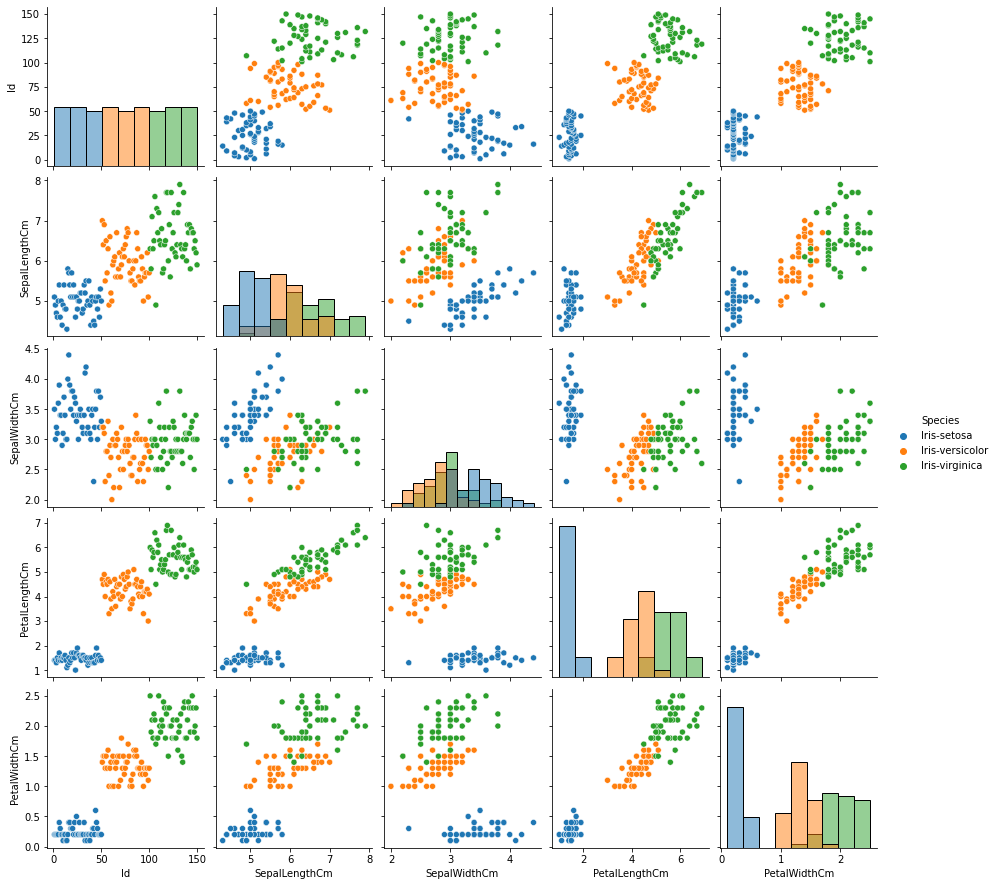

In [76]:
sns.pairplot(df,hue='Species',diag_kind='hist')

In [36]:
df_corr=df.corr()

In [37]:
df_corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


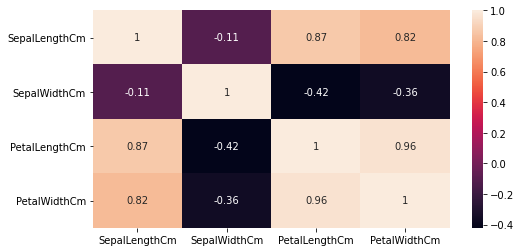

In [40]:
plt.figure(figsize=(8,4))
sns.heatmap(df_corr,annot=True)
plt.show()

In [41]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

#Training Model

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_predict=dtc.predict(x_test)
print("Acuuracy of decision tree on this trainig dataset",metrics.accuracy_score(y_predict,y_test))

Acuuracy of decision tree on this trainig dataset 0.9736842105263158


In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predict,y_test)

array([[13,  0,  0],
       [ 0, 15,  0],
       [ 0,  1,  9]])

#Visualizing Decsion Tree

In [66]:
text_representation=tree.export_text(dtc)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_2 >  4.95
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_1 <= 2.75
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  2.75
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: Iris-virginica



[Text(334.8, 733.86, 'PetalWidthCm <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = Iris-virginica'),
 Text(251.10000000000002, 570.78, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Iris-setosa'),
 Text(418.5, 570.78, 'PetalLengthCm <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = Iris-virginica'),
 Text(167.4, 407.70000000000005, 'PetalWidthCm <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = Iris-versicolor'),
 Text(83.7, 244.62, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Iris-versicolor'),
 Text(251.10000000000002, 244.62, 'SepalWidthCm <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(167.4, 81.54000000000008, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(334.8, 81.54000000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(669.6, 407.70000000000005, 'PetalLengthCm <= 5.05\ngini = 0.05\nsamples = 39\nvalue = [0, 

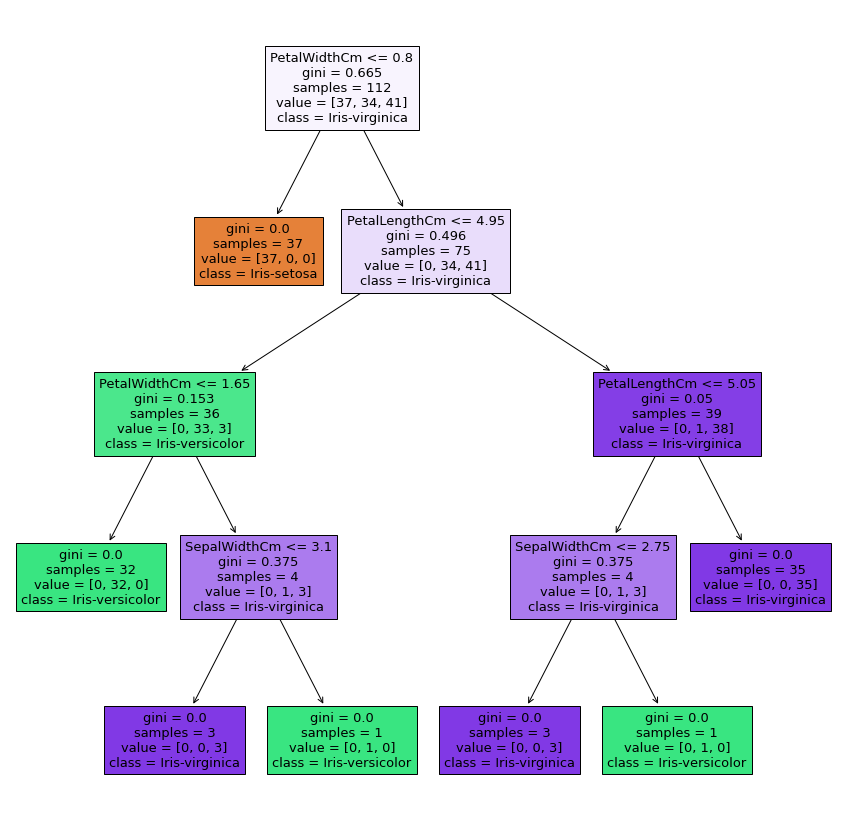

In [73]:
from sklearn import tree
a=np.unique(df['Species'])
y=[i for i in a]
plt.figure(figsize=(15,15))
tree.plot_tree(dtc,feature_names=df.columns,class_names=y,filled=True)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']